https://github.com/hyunyulhenry/quant_py/tree/main/data

In [2]:
!pip install pandas-datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ---------------------------------------- 109.5/109.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.6/3.9 MB 11.5 MB/s eta 0:00:01
   ----------- ---------------------------- 1.1/3.9 MB 11.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.6/3.9 MB 12.8 MB/s eta 0:00:01
   ---------------------- ----------------- 2.2/3.9 MB 11.5 MB/s eta 0:00:01
   --------------------------- ------------ 2.7/3.9 MB 12.3 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.9 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------  3.9/3.9 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 3.9/3.9 MB 11.9 MB/s eta 0:00:00


In [7]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
datasets[1:20]

['F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly']

In [10]:
# PBR별 포트폴리오의 수익률

df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME',
                        'famafrench',
                        start='2010-01-01')
df_pbr[0].head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
2010-01,1.38,-4.19,-2.13,-4.08,-4.14,-3.57,-1.73,-4.36,-1.21,-4.01,-4.27,-4.40,-2.85,-0.40,-3.30,-1.28,-6.71,-1.57,-0.83
2010-02,4.61,3.07,3.03,5.86,2.83,2.80,3.78,4.76,6.54,2.66,3.01,3.99,1.80,4.26,3.20,4.21,5.20,4.27,8.92
2010-03,9.58,5.31,6.88,7.98,5.42,6.29,6.40,6.64,9.49,4.88,5.96,4.91,7.46,4.42,8.83,6.80,6.50,8.59,10.39
2010-04,4.14,0.99,3.11,3.02,0.85,3.10,2.09,1.47,5.54,0.82,0.87,1.54,4.39,1.24,3.09,2.75,0.46,6.01,5.08
2010-05,-8.82,-7.31,-8.35,-8.44,-7.15,-7.96,-8.61,-7.91,-9.44,-7.89,-6.40,-7.94,-7.99,-8.16,-9.13,-8.58,-7.36,-8.79,-10.09


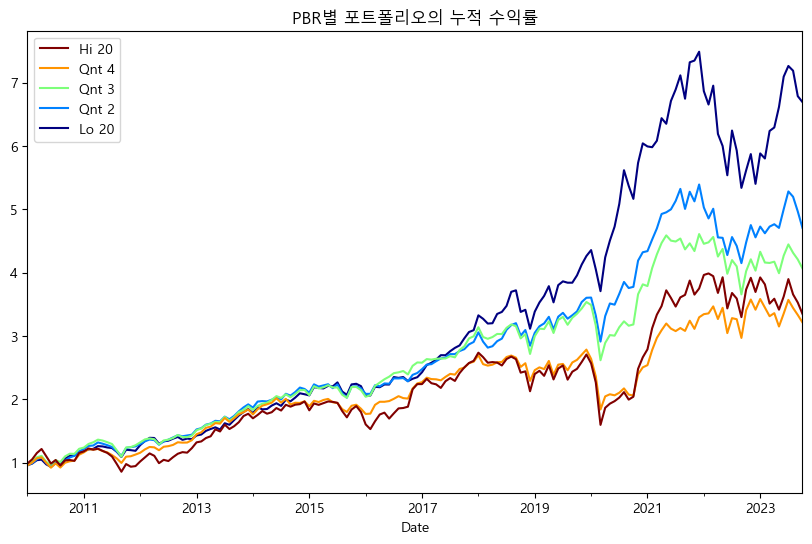

In [11]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

df_pbr_vw = df_pbr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pbr_cum = (1 + df_pbr_vw / 100).cumprod()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PBR별 포트폴리오의 누적 수익률')
plt.show()

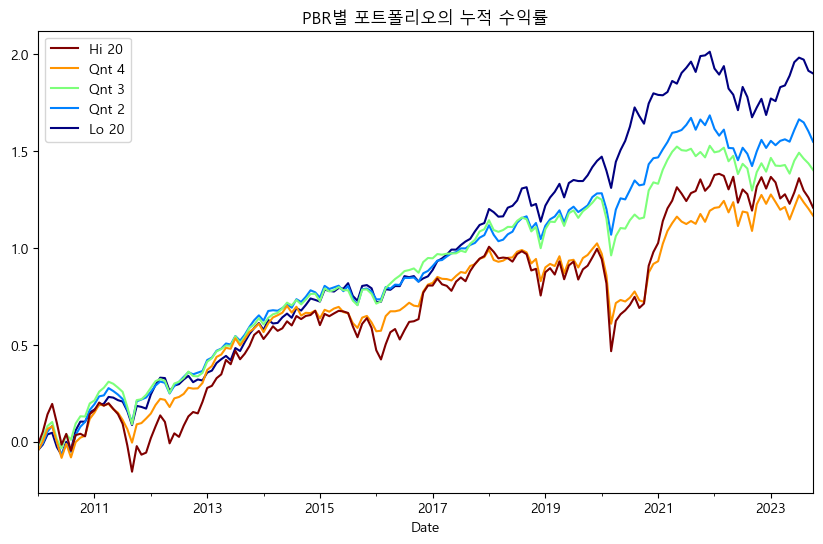

In [12]:
import numpy as np

df_pbr_cum = np.log(1+df_pbr_vw/100).cumsum()
df_pbr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PBR별 포트폴리오의 누적 수익률')
plt.show()

In [13]:
import pandas as pd

def factor_stat(df):

    n = len(df)

    ret_ari = (df / 100).mean(axis=0) * 12
    ret_geo = (1 + df / 100).prod()**(12 / n) - 1
    vol = (df / 100).std(axis=0) * np.sqrt(12)
    sharp = ret_ari / vol

    stat = pd.DataFrame(
        [ret_ari, ret_geo, vol, sharp],
        index=['연율화 수익률(산술)', '연율화 수익률(기하)', '연율화 변동성', '샤프지수']).round(4)

    stat.iloc[0:3, ] = stat.iloc[0:3, ] * 100

    return stat

In [14]:

factor_stat(df_pbr_vw)

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
연율화 수익률(산술),15.1000,12.2700,11.4000,9.9100,11.3100
연율화 수익률(기하),14.7300,11.8500,10.6800,8.8100,9.1300
연율화 변동성,16.0700,14.3500,15.5700,16.9100,22.3200
샤프지수,0.9396,0.8553,0.7322,0.5862,0.5067


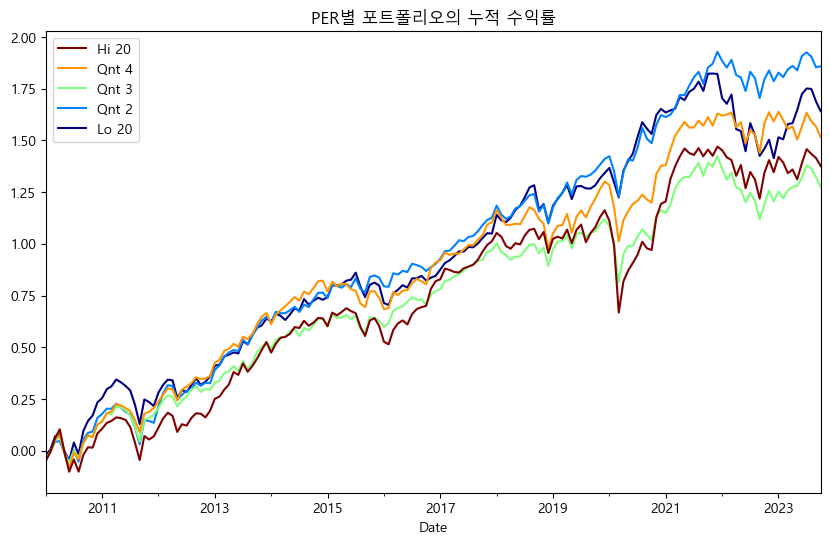

In [16]:
df_per = web.DataReader('Portfolios_Formed_on_E-P',
                        'famafrench',
                        start='2010-01-01')
df_per_vw = df_per[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_per_cum = np.log(1 + df_per_vw / 100).cumsum()
df_per_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PER별 포트폴리오의 누적 수익률')
plt.show()

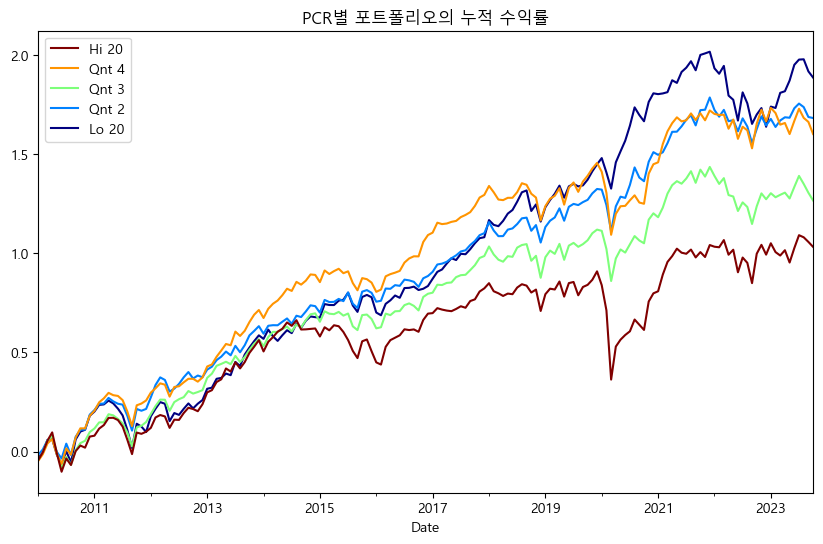

In [17]:
df_pcr = web.DataReader('Portfolios_Formed_on_CF-P',
                        'famafrench',
                        start='2010-01-01')
df_pcr_vw = df_pcr[0].loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pcr_cum = np.log(1 + df_pcr_vw / 100).cumsum()
df_pcr_cum.plot(figsize=(10, 6),
                colormap=cm.jet,
                legend='reverse',
                title='PCR별 포트폴리오의 누적 수익률')
plt.show()

In [19]:
!pip install SQLAlchemy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----------- ---------------------------- 0.6/2.1 MB 12.0 MB/s eta 0:00:01
   --------------------- ------------------ 1.1/2.1 MB 12.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.1 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 11.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/287.3 kB ? eta -:--:--
   ---------------------------------------- 287.3/287.3 kB 8.9 MB/s eta 0:00:00


In [21]:
!pip install pymysql

   ---------------------------------------- 0.0/44.8 kB ? eta -:--:--
   ---------------------------------------- 44.8/44.8 kB ? eta 0:00:00


In [26]:
import pickle
with open('stock_db.pkl', 'rb') as f:
    data = pickle.load(f)

ticker_list = data[0]   # 티커
sector_list = data[1]   # 섹터
price_list = data[2]    # 주가
fs_list = data[3]       # 재무제표
value_list = data[4]    # 밸류지표(TTM)

In [30]:
value_list

,종목코드,기준일,지표,값
0,000020,2023-01-25,DY,0.0195
1,000020,2023-01-25,PBR,0.7060
2,000020,2023-01-25,PCR,5.7809
3,000020,2023-01-25,PER,10.1679
4,000020,2023-01-25,PSR,0.7741
...,...,...,...,...
28024,441270,2023-05-02,PSR,NaN
28025,446070,2023-05-02,PBR,NaN
28026,446070,2023-05-02,PCR,NaN
28027,446070,2023-05-02,PER,NaN


In [31]:
value_list.loc[value_list['값'] <= 0, '값'] = np.nan
value_pivot = value_list.pivot(index='종목코드', columns='지표', values='값')

ValueError: Index contains duplicate entries, cannot reshape